# Imports

In [1]:
import os
import sys
import pandas as pd

# AI content (GitHub Copilot, 02/07/2024), verified and adapted by Nicolas Huber.
src_directory: str = os.path.join(os.getcwd(), "..")
sys.path.append(src_directory)

from helpers import data_analyzer as data_analyzer
from algorithms import angle_analyzer as angle_analyzer
from helpers import data_visualizer as data_visualizer
from helpers import optimize_thresholds as optimizer
import constants as constants

# Variables

In [2]:
CSV_FILE = "/Users/nicolas/Downloads/test_angle_analyzer.csv"

# Conditions

In [3]:
print("The automated threshold optimizer is executed for the following configuration:")
print(f"--> CSV file: {CSV_FILE}")
print(f"--> Runtime estimation: {constants.OPTIMIZATION_RUNTIME_ESTIMATION} seconds per iteration")
print(f"--> Optimization limit: {constants.OPTIMIZATION_LIMIT}")
print(f"--> Optimization step size: {constants.OPTIMIZATION_STEPS}")

The automated threshold optimizer is executed for the following configuration:
--> CSV file: /Users/nicolas/Downloads/test_angle_analyzer.csv
--> Runtime estimation: 12 seconds per iteration
--> Optimization limit: 20
--> Optimization step size: 5


# Initialisation

In [4]:
Optimizer: optimizer.ThresholdOptimizer = optimizer.ThresholdOptimizer(
    CSV_FILE,
    constants.R_VALUE_WEIGHT,
    constants.P_VALUE_WEIGHT,
    constants.STD_ERROR_WEIGHT,
    constants.OPTIMIZATION_LIMIT,
    constants.OPTIMIZATION_STEPS,
    constants.OPTIMIZATION_RUNTIME_ESTIMATION
)
AngleAnalyzer: angle_analyzer.AngleAnalyzer = angle_analyzer.AngleAnalyzer(
    CSV_FILE,
    constants.ANGLE_PAST_THRESHOLD,
    constants.ANGLE_FUTURE_THRESHOLD,
    constants.ANGLE_THRESHOLD,
    constants.LINEAR_REGRESSION_THRESHOLD,
)
DataAnalyzer: data_analyzer.DataAnalyzer = Optimizer.construct_data_analyzer()
Visualizer: data_visualizer.DataVisualizer = data_visualizer.DataVisualizer()

# Data Import

In [5]:
data: pd.DataFrame = AngleAnalyzer.read_csv_file()

# Optimization

In [6]:
optimization = Optimizer.optimize_thresholds(data, DataAnalyzer, AngleAnalyzer)
Optimizer.export_to_csv(optimization)

Total iterations: 4
--> Expected duration (initial estimation of runtime per iteration is 12 seconds): 48 seconds, 0.8 minutes, 0.01 hours. Estimated time finished: 2024-02-10 11:14:22.
--> Testing thresholds...
----> Iteration 1 of 4, testing thresholds: 10 & 10, estimated time remaining: 48 seconds, 0.8 minutes, 0.01 hours. Estimated time finished: 2024-02-10 11:14:22.
----> Iteration 2 of 4, testing thresholds: 10 & 15, estimated time remaining: 34.98 seconds, 0.58 minutes, 0.01 hours. Estimated time finished: 2024-02-10 11:14:20.
----> Iteration 3 of 4, testing thresholds: 15 & 10, estimated time remaining: 31.56 seconds, 0.53 minutes, 0.01 hours. Estimated time finished: 2024-02-10 11:14:33.
----> Iteration 4 of 4, testing thresholds: 15 & 15, estimated time remaining: 12.06 seconds, 0.2 minutes, 0.0 hours. Estimated time finished: 2024-02-10 11:14:25.
--> Processing results...
--> Results processed.
----> Total runtime: 55.4 seconds, 0.92 minutes, 0.02 hours.
--> Results exported

# Dataset

Ordered in descending order by score.

In [7]:
optimization

,angle_past_threshold,angle_future_threshold,average_r_value,average_p_value,average_std_err,score,data_loss
0,15,15,0.559061,8.408242e-08,0.026351,0.332802,54.707113
1,15,10,0.544917,3.603709e-06,0.030476,0.323901,53.373431
2,10,15,0.536681,3.320294e-06,0.029667,0.319041,52.876569
3,10,10,0.512407,6.772876e-06,0.033898,0.304052,51.072176


# Visualisation

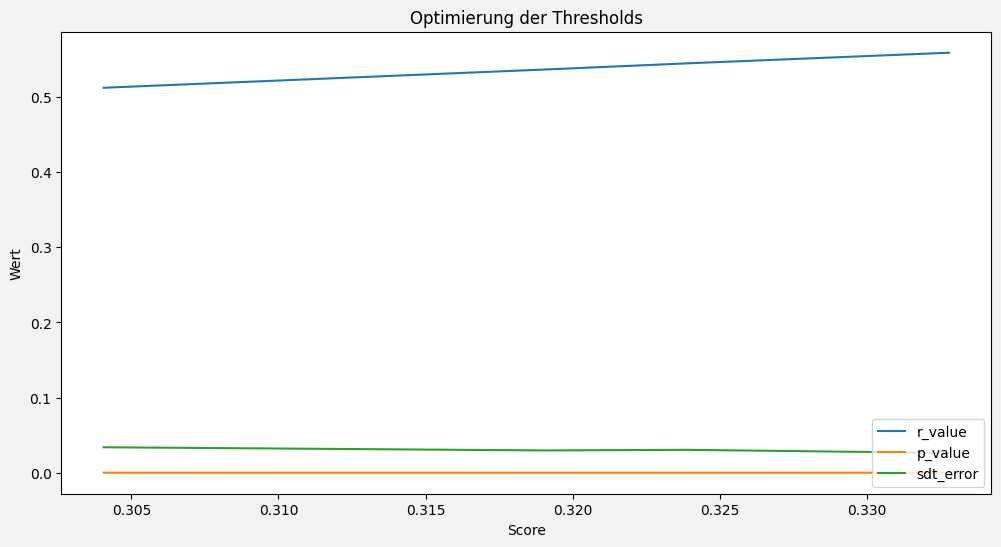

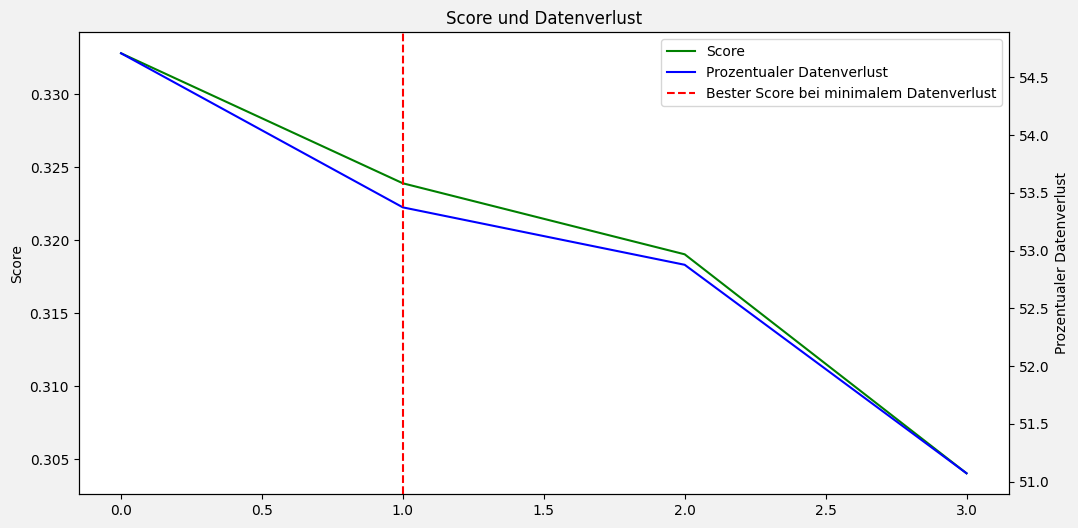

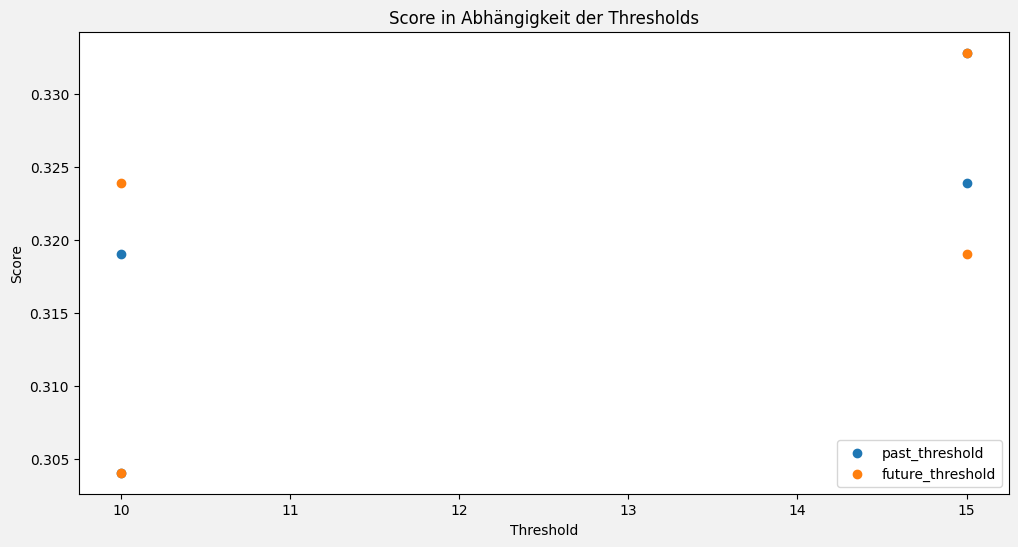

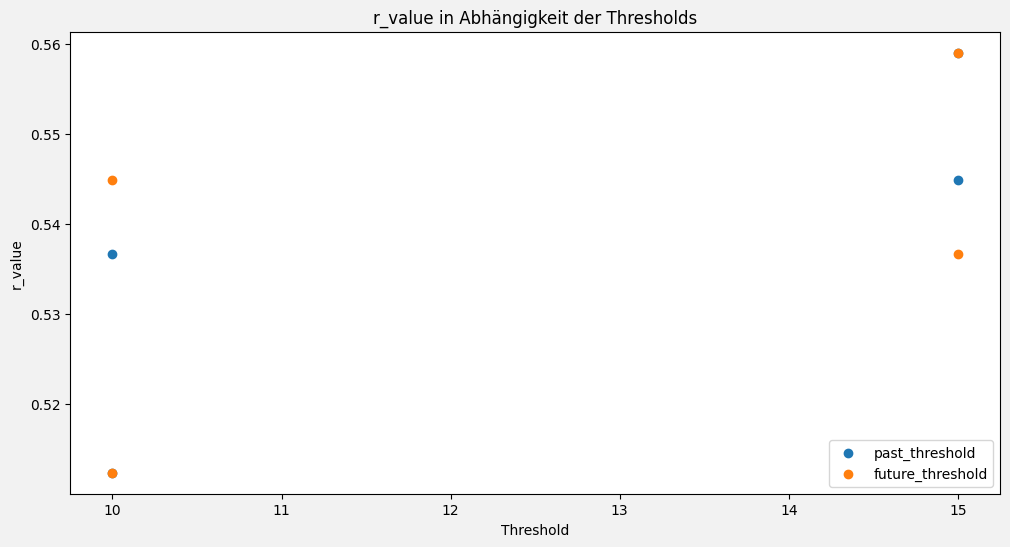

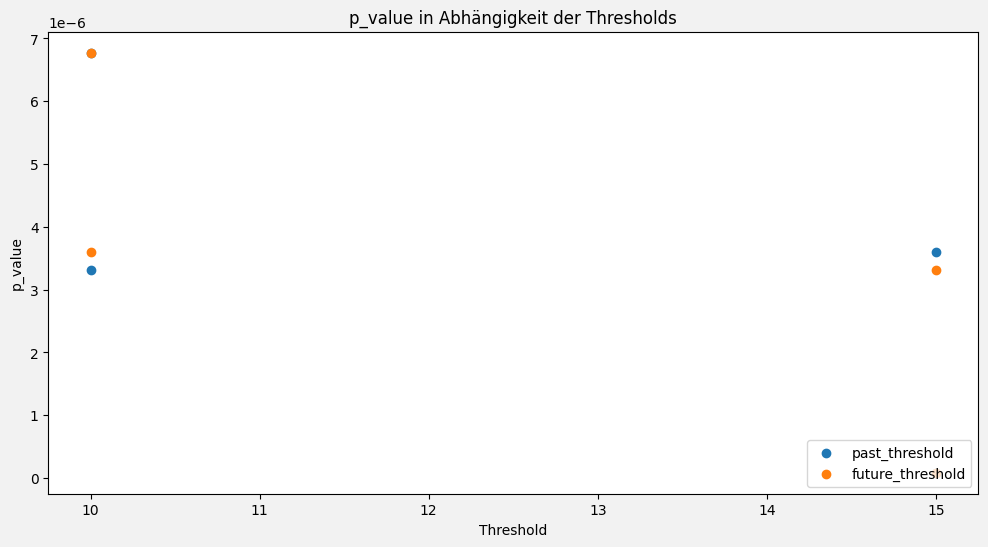

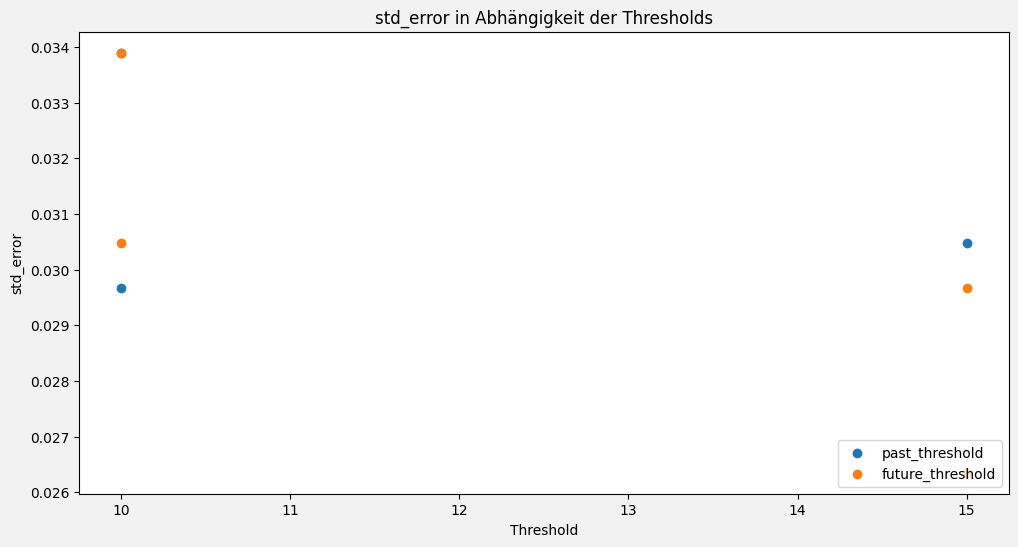

In [8]:
Visualizer.visualize_optimization_linear_regression(optimization)
Visualizer.visualize_score_by_data_loss(optimization)
Visualizer.visualize_optimization_score(optimization)
Visualizer.visualize_optimization_rvalues(optimization)
Visualizer.visualize_optimization_pvalues(optimization)
Visualizer.visualize_optimization_stderrs(optimization)

# Report

In [9]:
print("Individuelle Threasholds mit dem besten Score:")
print(f"--> past_threshold_optimized: {Optimizer.past_threshold_optimized}")
print(f"--> future_threshold_optimized: {Optimizer.future_threshold_optimized}")
print()

print("Unten findet sich eine tabellarische Übersicht der 5 besten Scores und deren Threasholds. Diese Angabe ist hier aussagekräftiger, da in der Analyse später für die Evaulierung eines Punktes sowohl die Zukunft als auch die Vergangenheit berücksichtigt werden und der Score somit die Interaktion der beiden Threasholds berücksichtigt.")

Individuelle Threasholds mit dem besten Score:
--> past_threshold_optimized: 15
--> future_threshold_optimized: 15

Unten findet sich eine tabellarische Übersicht der 5 besten Scores und deren Threasholds. Diese Angabe ist hier aussagekräftiger, da in der Analyse später für die Evaulierung eines Punktes sowohl die Zukunft als auch die Vergangenheit berücksichtigt werden und der Score somit die Interaktion der beiden Threasholds berücksichtigt.


In [10]:
Optimizer.best_scores

,angle_past_threshold,angle_future_threshold,average_r_value,average_p_value,average_std_err,score,data_loss
0,15,15,0.559061,8.408242e-08,0.026351,0.332802,54.707113
1,15,10,0.544917,3.603709e-06,0.030476,0.323901,53.373431
2,10,15,0.536681,3.320294e-06,0.029667,0.319041,52.876569
3,10,10,0.512407,6.772876e-06,0.033898,0.304052,51.072176


In [11]:
print(f"The recommended thresholds are {Optimizer.best_scores.iloc[0, 0]} (angle_past_threshold) and {Optimizer.best_scores.iloc[0, 1]} (angle_future_threshold) with a score of {Optimizer.best_scores.iloc[0, 5]}.")

The recommended thresholds are 15 (angle_past_threshold) and 15 (angle_future_threshold) with a score of 0.33280158710037355.


# System Info

In [12]:
print(f"@ Version {constants.VERSION}")
print(f"@ Author {constants.AUTHOR}")
print(f"@ Author Email {constants.AUTHOR_EMAIL}")
print(f"@ Author URL {constants.AUTHOR_URL}")
print(f"@ GitHub URL {constants.GITHUB_URL}")

@ Version 0.1.0
@ Author Nicolas Huber
@ Author Email info@nicolas-huber.ch
@ Author URL https://nicolas-huber.ch
@ GitHub URL https://github.com/nicolashuberIT/flight-analyzer
